# 因子分析

主成分分析是通过分析原变量的协方差矩阵去得到它们的一个线性变换，变换后的新变量（主成分）拥有对角的协方差矩阵。
其意义主要在于观察各原变量的方差如何分配给主成分的（方差贡献率），与正相关还是负相关（因子负荷）。
主成分具体怎么被原变量表示的系数矩阵由于可能与因子载荷阵混淆，甚至在SPSS里是不报告的。（当然那个本来做的就是因子分析，只是只利用了一部分结果而已，因子分析本来原则上就（除非用主成分法）得不出原变量对因子的关系。或者说这种关系有多个）

因子分析建模已经保相关标准化过的随机向量$X$。

$$
E(X) = 0 \\
diag(cov(X)) = (1,\ldots,1)^T 
$$

模型指定一个标准多元正态的$F$通过线性组合$A$来表示$X$。

$$
E(F) = 0 \\
cov(F) = I \\
X = AF + \epsilon
$$

注意$F$的维数一般比$X$低，比如说$X$可能有5维，而$F$只有1维。那么只用$AF$当然一般不可能表示$X$。
这时就加入一个自适应的$\epsilon$项使得等式总可以成立。当然我们要约束$\epsilon$的取法，
否则对任意$A$都可以导出一个“正确”的因子分析模型。

显然$E(\epsilon)=0$对任意$A$都成立。我们进一步要求$\epsilon$与$F$独立。有时还要求一个可有可无的性质，协方差矩阵对角。考虑以下关系：

$$
cov(X,X) = cov(AF+\epsilon, AF+\epsilon ) = cov(AF,AF) + 2Acov(F,\epsilon) + cov(\epsilon,\epsilon) = AA^T + cov(\epsilon,\epsilon)
$$

由于$cov(X,X)$一般是外部给定的，如果$cov(\epsilon,\epsilon)$的确被约束成了对角阵，我们的最重要的目标就是调整$A$，
使得$AA^T$起码可以表示掉所有的不同变量之间的协方差（协方差矩阵对角线以外的元素）。当然不要忘了最早的目标，
我们当然要利用$AA^T$组合"尽可能"表示掉$cov(X,X)$，给$\epsilon$剩的越少越好。不过如果这个优化目标与清除所有协方差要求矛盾，
还是优先在后者的约束下优化。

对“尽可能”表示这种说法，我们可以给出各种各样的具体刻画。如用要求$cov(\epsilon,\epsilon)$的L2范数越小越好。

$$
\min_A ||cov(\epsilon,\epsilon)||^2 \\
s.t. \; cov(\epsilon,\epsilon) \; \text{is diagonal}
$$

In [59]:
rcov <- function(n, r, Lam=NULL){
    if(is.null(Lam)){
        lam <- rep(0,n)
        lam[1:r] <- runif(r,0.5,1.5)
        Lam <- diag(lam)
    }
    A <- matrix(runif(n*n,-2,2),n)
    return(t(A) %*% Lam %*% A)
}

rmultinorm <- function(n,mu,Sigma){
    res <- eigen(Sigma)
    Lambda <- diag(res$values)
    P <- res$vectors
    r <- replicate(n,as.vector( P %*% Lambda^(1/2) %*% rnorm(length(mu))) + mu)
    return(r)
}


In [10]:
Sigma <- rcov(5,5)
ss <- diag(1/sqrt(diag(Sigma)))
Sigma <- ss %*% Sigma %*% t(ss)
Sigma

1.0000000,-0.30116480,0.40470422,0.31178405,-0.10608376
-0.3011648,1.00000000,-0.60686840,0.71222823,-0.07234447
0.4047042,-0.60686840,1.00000000,-0.56830500,-0.08993895
0.3117841,0.71222823,-0.56830500,1.00000000,0.09334798
-0.1060838,-0.07234447,-0.08993895,0.09334798,1.00000000


In [45]:
punish <- matrix(rep(1,25),5)
diag(punish) <- rep(0,5)
punish

0,1,1,1,1
1,0,1,1,1
1,1,0,1,1
1,1,1,0,1
1,1,1,1,0


In [46]:
fn <- function(par){
    A <- matrix(par,5)
    #A <- par
    err <- Sigma - A %*% t(A)
    return(sum((err * punish)^2))
}

In [47]:
res <- optim(rep(1,10),fn,control =list(maxit=10000))
res

$par
 [1]  0.243291292 -0.372686023  1.735866107 -1.135595844 -0.045911225
 [6]  0.116917715  0.056697889  0.278710924  5.024286914  0.007851464

$value
[1] 0.1353981

$counts
function gradient 
    1755       NA 

$convergence
[1] 0

$message
NULL


In [48]:
A <- matrix(res$par,5) 
A %*% t(A)

0.07286040,-0.08404228,0.45490735,0.3111476,-0.010251826
-0.08404228,0.14210952,-0.63113071,0.7080872,0.017555633
0.45490735,-0.63113071,3.09091092,-0.5709187,-0.077507450
0.31114757,0.70808716,-0.57091869,26.5330369,0.091584605
-0.01025183,0.01755563,-0.07750745,0.0915846,0.002169486


In [49]:
Sigma

1.0000000,-0.30116480,0.40470422,0.31178405,-0.10608376
-0.3011648,1.00000000,-0.60686840,0.71222823,-0.07234447
0.4047042,-0.60686840,1.00000000,-0.56830500,-0.08993895
0.3117841,0.71222823,-0.56830500,1.00000000,0.09334798
-0.1060838,-0.07234447,-0.08993895,0.09334798,1.00000000


In [50]:
A %*% t(A) - Sigma

-0.9271395950,0.217122526,0.050203138,-0.0006364885,0.09583193
0.2171225265,-0.857890478,-0.024262312,-0.0041410726,0.08990010
0.0502031376,-0.024262312,2.090910921,-0.0026136879,0.01243150
-0.0006364885,-0.004141073,-0.002613688,25.5330369188,-0.00176338
0.0958319333,0.089900100,0.012431496,-0.0017633795,-0.99783051


还比较靠谱，既然维数比应有的低，表示不了所有方差是自然地，能清掉大部分协方差就不错了。我们看看提取两个主成分情况下主成分的效果

In [38]:
res <- eigen(Sigma)
A <- res$vectors %*% diag(sqrt(res$values))
A %*% t(A)

1.0000000,-0.30116480,0.40470422,0.31178405,-0.10608376
-0.3011648,1.00000000,-0.60686840,0.71222823,-0.07234447
0.4047042,-0.60686840,1.00000000,-0.56830500,-0.08993895
0.3117841,0.71222823,-0.56830500,1.00000000,0.09334798
-0.1060838,-0.07234447,-0.08993895,0.09334798,1.00000000


In [39]:
A[,1:2] %*% t(A[,1:2])

0.9647696,-0.2393894,0.4520481,0.29576280,-0.23993169
-0.2393894,0.8160635,-0.7765260,0.74165904,0.07620870
0.4520481,-0.7765260,0.7951239,-0.57703888,-0.12706141
0.2957628,0.7416590,-0.5770389,0.96860527,-0.05559348
-0.2399317,0.0762087,-0.1270614,-0.05559348,0.06003683


In [40]:
A[,1:2] %*% t(A[,1:2]) - Sigma

-0.03523037,0.06177540,0.047343860,-0.016021259,-0.13384793
0.06177540,-0.18393650,-0.169657634,0.029430812,0.14855317
0.04734386,-0.16965763,-0.204876118,-0.008733884,-0.03712246
-0.01602126,0.02943081,-0.008733884,-0.031394729,-0.14894146
-0.13384793,0.14855317,-0.037122462,-0.148941460,-0.93996317


看得出效果其实都差不多（差）。

如果我们的目标主要集中在解决对角线外的协方差，而把对角线上的方差全交给特殊因素$\epsilon$处理，
我们可以在评估一种$A$的构造方法时可以忽略对角元，就像这样。

只使用两个向量的全局L2优化（只对对角元产生损失）



In [53]:
res <- optim(rep(1,10),fn,control =list(maxit=10000))

A <- matrix(res$par,5) 
resi <- Sigma - A %*% t(A) 
diag(resi) <- 0
resi

0.0000000000,-0.217122526,-0.050203138,0.0006364885,-0.09583193
-0.2171225265,0.000000000,0.024262312,0.0041410726,-0.08990010
-0.0502031376,0.024262312,0.000000000,0.0026136879,-0.01243150
0.0006364885,0.004141073,0.002613688,0.0000000000,0.00176338
-0.0958319333,-0.089900100,-0.012431496,0.0017633795,0.00000000


只使用两个特征向量的主成分法

In [56]:
res <- eigen(Sigma)
A <- (res$vectors %*% diag(sqrt(res$values)))[,1:2]

resi <- Sigma - A %*% t(A)
diag(resi) <- 0
resi

0.00000000,-0.06177540,-0.047343860,0.016021259,0.13384793
-0.06177540,0.00000000,0.169657634,-0.029430812,-0.14855317
-0.04734386,0.16965763,0.000000000,0.008733884,0.03712246
0.01602126,-0.02943081,0.008733884,0.000000000,0.14894146
0.13384793,-0.14855317,0.037122462,0.148941460,0.00000000


之前的分析全部都是基于样本相关（协方差）矩阵的分析，如果一定要只能对某个矩阵总结关联信息的话，最优的当然是这个。
然而如果还有样本的各观测信息而相关矩阵是通过其估计出时。我们也可以转而去处理样本信息。比如假设$F,\epsilon$服从正态分布。
此时$X$服从多元正态分布，其参数由特殊方差和$A$决定。我们的目标是最大化实际样本出现的似然度。

$$
\Sigma = AA^T + cov(\epsilon,\epsilon) \\
f(x;\mu,\Sigma) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}} exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right) \\
L(\Sigma) = \prod_i f(x_i;0,\Sigma) \\
\max_{A,cov(\epsilon,\epsilon)} L(\Sigma) \\
$$

在约束$cov(\epsilon,\epsilon)$为对角矩阵中优化。在这种情况下我们可以确定$\epsilon$是对角阵，但这并不是说残差阵就是零矩阵了。
这涉及我们把对角线外的那些协方差放到$\epsilon$里还是因为不大直接忽视掉。如果把$\Sigma$看成真实的，为了遵守模型形式我们就必须把
残协方差放到$\epsilon$里或者加以忽视，但如果$\Sigma$其实看看做样本协方差，那么一次随机试验内有非零残差阵也是理所当然的。虽然后者看上去更合理，
但采取前者观点的部分原因是后者必须假设分布，否则就没什么帮助。正如我们所看到，即使是假设多元中处理起来比较方便的多元正态分布，也很复杂。

该法与L2方法不同的是它考虑了样本上的信息，从而以加权L2的角度看，似乎是给不同格加了不同的权，只不过这种权是由正态分布似然函数导出的。

我们进行对数化来简化优化问题

$$
\log f(x;\mu,\Sigma) = -\log ((2\pi)^{p/2}|\Sigma|^{1/2}) -\frac{1}{2}(x- \mu)^T \Sigma^{-1}(x - \mu) \\
\log L(\Sigma) = \sum_i \log f(x;\mu,\Sigma) = -n \log ((2\pi)^{p/2}|\Sigma|^{1/2}) - \sum_i \frac{1}{2}(x_i - \mu)^T \Sigma^{-1}(x_i -\mu)
$$

这里有一个问题，我们怎么处理$\mu$？是把直接换成$\bar{x}$，还是一同加入到极大似然估计中（但不使用它）？虽然我们假设它以保相关标准化过，
但它一般是用“样本均值”标准化而不是参数，从而我们似乎并不能武断在此处设$0$。前两种策略会不会实际是等价的
（考虑到均值与方差经常出现的那种“不相关”关系？）？

按照《实用多元统计》的做法，用$\bar{x}$取代。

$$
\log L(\Sigma) = \sum_i \log f(x;\mu,\Sigma) = -n \log ((2\pi)^{p/2}|\Sigma|^{1/2}) - \frac{1}{2} \sum_i (x_i - \bar{x})^T \Sigma^{-1}(x_i -\bar{x})
$$

如果之所以已经标准化，这里其实等价于变化后的变量置于$\mu=0$

于是有了一个有趣的问题，我们是直接随机生成一个正定矩阵当协方差矩阵用的。
既可以把它看成真实的也可以看成是另外某个未知真实协方差矩阵的总体的抽样结果。目前都没有遇上什么困难，然而现在我们发现我们实际没有总体
从而也就没法用最大似然法。用它当真实协方差矩阵生成一些样本则有种逻辑矛盾的感觉。而且显然那样我们的估计的$A,\epsilon$也是随机的。

正确的模拟方式似乎是建立一个真实的因子模型，然后随机波动之，再看看几种搞法搞出了什么样的偏离。

这些方法虽然可以由某种理论或模型导出，但它们的使用总是离那些初始相差甚远？？？它没有统计推断，结果成了一种探索性方法？（貌似的确。。）

In [58]:
Sigma

1.0000000,-0.30116480,0.40470422,0.31178405,-0.10608376
-0.3011648,1.00000000,-0.60686840,0.71222823,-0.07234447
0.4047042,-0.60686840,1.00000000,-0.56830500,-0.08993895
0.3117841,0.71222823,-0.56830500,1.00000000,0.09334798
-0.1060838,-0.07234447,-0.08993895,0.09334798,1.00000000


In [143]:
rX <- rmultinorm(1000,c(1,-1,1,-1,1),Sigma)
X <- t(scale(t(rX)))
apply(X,1,sd)

Sigma.s <- cor(t(X))

[1] 1 1 1 1 1

In [137]:
fn <- function(Sigma){
    p <- nrow(Sigma)
    n <- ncol(X)
    left <- -n * log((2*pi)^(p/2) * sqrt(det(Sigma)))
    Sigma.inv <- solve(Sigma)
    right <- -0.5 * sum(sapply(1:n,function(i){
        t(X[,i]) %*% Sigma.inv %*% X[,i]
    }))
    return(left + right)
}



In [148]:
fn(Sigma)

[1] -5181.244

In [107]:
Sigma2 <- Sigma

In [118]:
dmultinorm <- function(x, mu, sigma){
    p <- length(mu)
    coe <- 1/( (2*pi)^(p/2) * sqrt(det(sigma)) )
    power <- -1/2 * t(x - mu) %*% solve(sigma) %*% (x-mu)
    return( coe * exp(power))
}


In [127]:
lmultinorm <- function(x, det.sigma, solve.sigma){
    p <- nrow(solve.sigma)
    coe <- 1/( (2*pi)^(p/2) * sqrt(det.sigma)) 
    power <- -1/2 * t(x) %*% solve.sigma %*% (x)
    return( coe * exp(power))
}

In [128]:
fn2 <- function(Sigma){
    n <- ncol(X)
    det.Sigma <- det(Sigma)
    solve.Sigma <- solve(Sigma)
    sum(sapply(1:n,function(i){
        log(lmultinorm(X[,i],det.Sigma,solve.Sigma))
    }))
}

In [129]:
fn2(Sigma)

[1] -5018.828

In [132]:
Sigma2 <- cor(t(X))

In [157]:
func <- function(par){
    # A 5 x 2 matrix  
    A <- matrix(par[1:10],5) 
    e <- diag(par[11:15])
    Sigma <- A %*% t(A) + e
    -fn(Sigma) # for max
}

In [159]:
func(runif(15))

[1] 7830.474

In [158]:
optim(runif(15),func)

$par
 [1]  0.81267054  0.27088657  0.06157082  0.84908328 -0.12643438  0.68308886
 [7] -0.52050913  0.98783022 -0.15863783 -0.04874940  0.12254484  0.63420143
[13]  0.20196044  0.97939990  0.91556773

$value
[1] 6566.954

$counts
function gradient 
     502       NA 

$convergence
[1] 1

$message
NULL


In [160]:
res <- optim(runif(15),func,control =list(maxit=10000))
res

$par
 [1]  0.44569320  0.79538595 -0.42701349  1.45608372  0.54969681  1.10830784
 [7] -0.43020801  0.63477562  0.07748466 -0.12551136 -0.06814104  0.53047929
[13]  0.55493077 -0.42260773  1.41717893

$value
[1] 5377.623

$counts
function gradient 
    6310       NA 

$convergence
[1] 0

$message
NULL


In [171]:
res2 <- optim(runif(15),func,control =list(maxit=10000))
res2

$par
 [1]  0.54596386 -0.03637536 -1.22896456  1.78745300  0.19408893  0.00743358
 [7]  1.32874130 -0.60818117  0.90568445  0.08121188  0.72624851 -0.57292872
[13]  2.87566551 -1.40621148  0.86651001

$value
[1] 5922.242

$counts
function gradient 
    6708       NA 

$convergence
[1] 0

$message
NULL


In [172]:
res3 <- optim(runif(15),func,control =list(maxit=10000))
res3

$par
 [1]  1.12623155  0.55571650  0.08098264  1.94076951  0.59922501  0.82510913
 [7] -0.47331054  1.03520157 -0.22040888  0.41594177  0.79833596  0.63964550
[13]  0.22742354 -1.23891407  1.72145447

$value
[1] 5604.204

$counts
function gradient 
    9734       NA 

$convergence
[1] 0

$message
NULL


In [173]:
res4 <- optim(runif(15),func,control =list(maxit=10000))
res4

Warning message in sqrt(det(Sigma)):
"产生了NaNs"

$par
 [1]  0.7117153  0.9143626 -0.4829120  1.8077754  0.5421686  1.2247182
 [7] -0.5205864  1.0516895  0.2472737  0.7138117  0.4181436  0.5128271
[13]  0.3400700 -0.6552299  1.3651369

$value
[1] 5608.709

$counts
function gradient 
    4268       NA 

$convergence
[1] 0

$message
NULL


In [163]:
fn(Sigma)

[1] -5181.244

In [164]:
fn(Sigma2)

[1] -5208.615

In [170]:
matrix(res$par[1:10],5) %*% t(matrix(res$par[1:10],5)) + diag(res$par[11:15])

1.3588476,-0.1223048,0.5132098,0.7348435,0.1058909
-0.1223048,1.3481970,-0.6127261,1.1248140,0.4912171
0.5132098,-0.6127261,1.1402114,-0.5725820,-0.3143995
0.7348435,1.1248140,-0.5725820,1.7035759,0.7906794
0.1058909,0.4912171,-0.3143995,0.7906794,1.7350986


In [169]:
Sigma

1.0000000,-0.30116480,0.40470422,0.31178405,-0.10608376
-0.3011648,1.00000000,-0.60686840,0.71222823,-0.07234447
0.4047042,-0.60686840,1.00000000,-0.56830500,-0.08993895
0.3117841,0.71222823,-0.56830500,1.00000000,0.09334798
-0.1060838,-0.07234447,-0.08993895,0.09334798,1.00000000


看起来这个优化也不是那么简单的事。。一般优化法居然连相关矩阵的形状都没有优化出来，更不要说那个负方差了。

作为一个困难的问题，我们勇敢的选择跳过。之后都直接使用主成分法。

## 共同度与特殊方差的评价

除了残差阵外，还可以基于共同度（共同方差）与特殊方差来归纳原变量上方差的解释程度。补充一下协方差结构信息。

$$ 
cov(X,X) = AA^T + cov(\epsilon) \\
cov(X,F) = cov(AF + \epsilon,F) = Acov(F,F) + cov(\epsilon,F) = A \\
var(X_i) = (AA^T)_{ii} + cov(\epsilon)_{ii} = \sum_{j=1}^p (A_{ij})^2 + cov(\epsilon)_{ii} = 1
$$

第三个公式构成了左边的和式称为共同度，右边的$cov(\epsilon)_{ii}$称为特殊方差。显然共同度越大，特殊方差越小说明拟合程度越好。

## 因子分析上的推断

上面的极大似然法实际是对$\Sigma$在一个限制范围（$AA^T + cov(\epsilon)$能表示的范围）里的最大似然。比较以直接的样本协方差矩阵或者
总体协方差矩阵的极大似然估计（貌似这个是用$n$调整而不是用$n-1$，所以并不是样本协方差矩阵？忘了。），容易联想到似然比检验。

显然我们可以用似然比来衡量在某个因子数量下，多增加一个因子(放开对$A$的自由度限制)是否产生了显著差异。这时我们假设的
是$\Sigma = AA^T + cov(\epsilon)$，这个表示（限制）是正确的。代表数据在这个方向的倾向的无限制极大似然估计若与其偏离不大，
则似然比$\Lambda$偏向1，则$-2ln\Lambda$偏小，从而不会拒绝原假设，得到符合预期的结论。



## 因子旋转

因子旋转是在载荷阵右边作用一个正交矩阵$P$。

如果

$$
\Sigma = AA^T + cov(\epsilon)
$$

的确正确,显然

$$
\Sigma = AP(AP^T)^T + cov(\epsilon) = AA^T + cov(\epsilon)
$$

于是正确性并没有变化。$AP$在这个意义上与$A$是无法分辨的。但我们宁可偏好所有$AP$中“好解释”的一些，
其向量最好两极化，而不是多数效应都混在一起。于是当我们得到一个在残差阵意义上满意的$A$后，
我们可能对它施加旋转$P$以在满意的偏离水平下进一步改进解释性结果。

In [16]:
examination <- read.csv("examination.csv")

In [19]:
df <- scale(examination[,-1])

In [20]:
PCA <- function(df, FULL = FALSE, extract.n = NULL, extract.p = 0.85){
    Sigma <- cov(df)
    res <- eigen(Sigma)
    
    P <- res$vectors
    lambda <- res$values
    Lambda <- diag(lambda)
    p <- length(lambda)

    component <- t(P) * sqrt(matrix(rep(lambda, p),p)) * t(sqrt(matrix(rep(diag(Sigma),p),p)))
    explain <- data.frame(total = lambda, percent = lambda/sum(lambda))
    explain$cumpercent <- cumsum(explain$percent)
    
    if(FULL){
        extract.n = p
    }
    if(is.null(extract.n)){
        extract.n <- min(which(cumsum(lambda)/sum(lambda) > extract.p))
    }
    return(list(coef = t(P)[1:extract.n,], lambda = lambda, component = component[1:extract.n,], 
                corr = cor(df), extract.n = extract.n, 
                explain = explain,
                explain.percent = sum(lambda[1:extract.n])/sum(lambda)))
}

In [21]:
res <- PCA(df)
res

$coef
            [,1]        [,2]        [,3]        [,4]         [,5]       [,6]
[1,] -0.31381244 -0.33131877 -0.35892166 -0.36477465  0.020329262  0.2017084
[2,] -0.02502806  0.13733156 -0.01215405  0.16614043 -0.726628411 -0.1792414
[3,] -0.04997077 -0.06296683  0.15289294  0.16016587  0.001398638  0.2397796
[4,]  0.03531518 -0.09084055  0.16289604 -0.07213282 -0.220612770 -0.4874583
[5,]  0.49731457  0.11508420  0.13946569 -0.05016472  0.094736160  0.4913045
            [,7]       [,8]          [,9]        [,10]      [,11]       [,12]
[1,] -0.34757914 -0.2623962 -0.3246531947 -0.308338807 -0.2148813 -0.19196163
[2,] -0.11575541  0.2192653 -0.1617698721 -0.002551512 -0.4985270  0.12338447
[3,]  0.11130315  0.2499819 -0.0002318143  0.127591928  0.1239623 -0.63376286
[4,]  0.05591126 -0.5375879  0.1778178281 -0.258708459  0.3210596  0.05756187
[5,] -0.02115726 -0.1522143  0.3197217167 -0.360188647 -0.3514300  0.18020398
          [,13]
[1,] -0.1249239
[2,] -0.2030800
[3,] -0.6154928
[4,] -0.4188177
[5,] -0.2357125

$lambda
 [1] 6.45274411 1.44268166 1.30970520 0.98257641 0.92917558 0.57820280
 [7] 0.39615819 0.32311406 0.23109371 0.18566367 0.07777643 0.05312037
[13] 0.03798781

$component
            [,1]        [,2]        [,3]        [,4]         [,5]       [,6]
[1,] -0.79715428 -0.84162430 -0.91174184 -0.92660975  0.051640904  0.5123846
[2,] -0.03006162  0.16495125 -0.01459843  0.19955407 -0.872765619 -0.2152898
[3,] -0.05718773 -0.07206072  0.17497427  0.18329758  0.001600635  0.2744095
[4,]  0.03500617 -0.09004568  0.16147069 -0.07150165 -0.218682391 -0.4831930
[5,]  0.47938018  0.11093398  0.13443621 -0.04835566  0.091319741  0.4735869
            [,7]       [,8]          [,9]        [,10]      [,11]      [,12]
[1,] -0.88292930 -0.6665456 -0.8246922291 -0.783250011 -0.5458468 -0.4876258
[2,] -0.13903577  0.2633633 -0.1943045172 -0.003064664 -0.5987891  0.1481992
[3,]  0.12737794  0.2860852 -0.0002652937  0.146019203  0.1418654 -0.7252931
[4,]  0.05542203 -0.5328839  0.1762619082 -0.256444739  0.3182503  0.0570582
[5,] -0.02039427 -0.1467250  0.3081917651 -0.347199358 -0.3387566  0.1737054
          [,13]
[1,] -0.3173349
[2,] -0.2439228
[3,] -0.7043844
[4,] -0.4151530
[5,] -0.2272121

$corr
              语文       数学        英语       地理        政治       历史
语文    1.00000000  0.6749125  0.78201898  0.7069137  0.01934992 -0.2651230
数学    0.67491254  1.0000000  0.70084076  0.7836271 -0.13163171 -0.3843151
英语    0.78201898  0.7008408  1.00000000  0.8542217 -0.10902986 -0.3655943
地理    0.70691372  0.7836271  0.85422165  1.0000000 -0.16582218 -0.4777964
政治    0.01934992 -0.1316317 -0.10902986 -0.1658222  1.00000000  0.2343808
历史   -0.26512304 -0.3843151 -0.36559434 -0.4777964  0.23438078  1.0000000
化学    0.65109346  0.6376088  0.80821370  0.7942260  0.11939225 -0.4807560
物理    0.42113391  0.5588403  0.54616595  0.7695570 -0.10399956 -0.1969260
生物    0.78430741  0.6749958  0.78288962  0.6615359  0.04080430 -0.3011715
计算机  0.43180585  0.6529460  0.65349958  0.7728118 -0.06263532 -0.3188487
音乐    0.28362169  0.3055765  0.58983176  0.3941992  0.29815249 -0.3202416
体育    0.42864632  0.4721955  0.38144621  0.3571213 -0.09399450 -0.3781728
美术    0.22482752  0.2575922  0.09667314  0.1353337  0.15545026 -0.1824318
             化学       物理       生物      计算机       音乐       体育
语文    0.6510935  0.4211339  0.7843074  0.43180585  0.2836217  0.4286463
数学    0.6376088  0.5588403  0.6749958  0.65294601  0.3055765  0.4721955
英语    0.8082137  0.5461659  0.7828896  0.65349958  0.5898318  0.3814462
地理    0.7942260  0.7695570  0.6615359  0.77281176  0.3941992  0.3571213
政治    0.1193923 -0.1039996  0.0408043 -0.06263532  0.2981525 -0.0939945
历史   -0.4807560 -0.1969260 -0.3011715 -0.31884870 -0.3202416 -0.3781728
化学    1.0000000  0.6284526  0.7562184  0.62167490  0.5309343  0.3483424
物理    0.6284526  1.0000000  0.3361668  0.64414211  0.1027941  0.1253052
生物    0.7562184  0.3361668  1.0000000  0.52206823  0.5050858  0.3591087
计算机  0.6216749  0.6441421  0

In [24]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

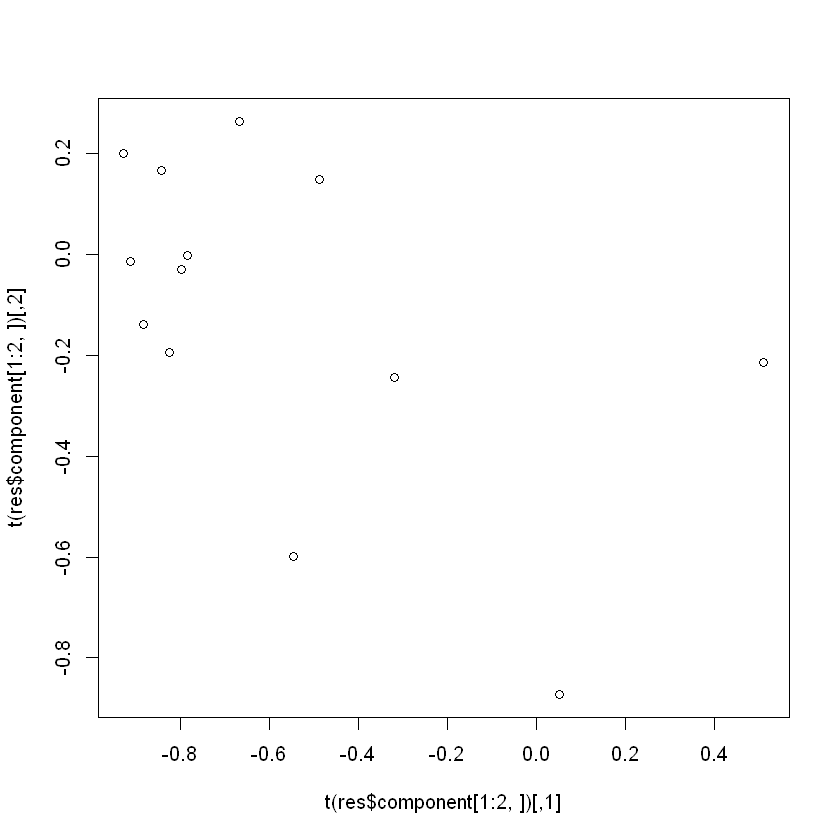

In [26]:
plot(t(res$component[1:2,]))

In [28]:
comp <- res$component[1:2,]

rotate2d <- function(theta){
    matrix(c(cos(theta),-sin(theta),sin(theta),cos(theta)),2)
}

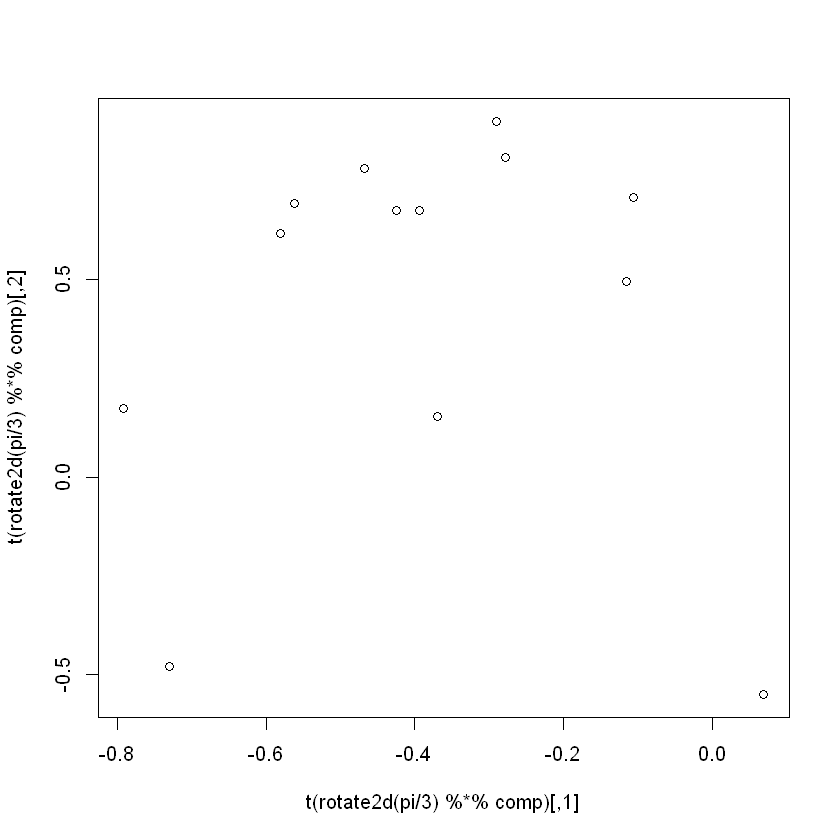

In [30]:
plot(t(rotate2d(pi/3) %*% comp))

In [37]:
p <- ncol(df)
m <- nrow(comp)

fV <- function(theta){
    A <- rotate2d(theta) %*% comp
    1/p * sum(sapply(1:m,function(j){
        sum(A[,j]^4) - sum(A[,j]^2)^2/p
    }))
}

fn <- function(theta){
    -fV(theta)
}

In [38]:
optim(0,fn)

Warning message in optim(0, fn):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"

$par
[1] -0.09589844

$value
[1] -0.06530048

$counts
function gradient 
      22       NA 

$convergence
[1] 0

$message
NULL


In [34]:
fn(0)

[1] 0.06411619

In [39]:
-0.095/pi * 180

[1] -5.443099

In [41]:
city <- read.csv("city.csv")

In [42]:
city

X,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
北 京,830.80,38103630,30671.14,127.40,5925388,64413910,434.15,10989365,15,17.30,8.56,44.94
天 津,549.74,40496103,34679.00,15.38,2045295,18253200,174.50,3254148,18,7.99,7.23,17.45
石 家庄,331.33,11981505,10008.48,8.07,493429,10444919,86.74,1067432,18,7.23,8.28,21.56
太 原,222.63,5183200,15248.11,2.43,333473,6601300,74.55,945212,16,5.06,7.88,20.58
呼和浩特,97.81,2407794,4155.10,2.00,205779,2554496,28.90,407963,18,3.81,8.92,26.58
沈 阳,440.60,10643612,14635.74,7.30,810889,14229575,101.70,1521548,15,9.32,6.70,28.36
长 春,313.05,15115270,10891.98,6.94,459709,8313564,89.70,1244167,15,11.87,7.03,18.75
哈 尔 滨,454.52,7215089,9517.80,24.99,763600,11536951,168.83,2102165,14,12.75,6.34,18.51
上 海,1041.39,103000000,63861.00,35.22,8992850,60546000,281.51,7686511,19,14.57,12.92,19.11
南 京,391.67,25093816,14804.68,7.62,1364788,11336202,87.91,1950742,16,9.06,12.13,136.72


In [44]:
df <- scale(city[,-1])

res <- PCA(df)
res

$coef
           [,1]       [,2]       [,3]       [,4]        [,5]        [,6]
[1,] -0.3401221 -0.3306421 -0.3214159 -0.3053066 -0.37005455 -0.38115834
[2,] -0.1987703  0.1552810 -0.1286111 -0.1241594  0.03792599 -0.01933430
[3,] -0.1361367 -0.2517349 -0.3140965  0.3829554 -0.12310022  0.05533104
           [,7]        [,8]        [,9]       [,10]       [,11]       [,12]
[1,] -0.3613150 -0.37585762 -0.02275436 -0.08003303 -0.09392243 -0.09321217
[2,] -0.1264228 -0.02377868  0.28438527  0.54926730  0.56672771  0.42697962
[3,]  0.1356323  0.15512459 -0.69100823  0.12444035  0.04952536  0.34158359

$lambda
 [1] 6.670657755 2.675131634 1.106824226 0.669757362 0.437086405 0.229113795
 [7] 0.075767507 0.073479526 0.031675753 0.021493194 0.006686654 0.002326189

$component
           [,1]       [,2]       [,3]       [,4]        [,5]        [,6]
[1,] -0.8784542 -0.8539697 -0.8301406 -0.7885342 -0.95576270 -0.98444113
[2,] -0.3251054  0.2539750 -0.2103542 -0.2030730  0.06203111 -0.03162285
[3,] -0.1432236 -0.2648395 -0.3304475  0.4028910 -0.12950847  0.05821142
           [,7]       [,8]        [,9]      [,10]       [,11]      [,12]
[1,] -0.9331906 -0.9707506 -0.05876909 -0.2067062 -0.24257924 -0.2407448
[2,] -0.2067750 -0.0388920  0.46513570  0.8983722  0.92693019  0.6983606
[3,]  0.1426930  0.1631999 -0.72698015  0.1309184  0.05210351  0.3593655

$corr
             x1        x2           x3          x4        x5         x6
x1   1.00000000 0.6842633  0.876817441  0.64436027 0.7953274 0.84444176
x2   0.68426334 1.0000000  0.789579348  0.41704238 0.9189804 0.81086658
x3   0.87681744 0.7895793  1.000000000  0.44212847 0.8071206 0.77788284
x4   0.64436027 0.4170424  0.442128468  1.00000000 0.6768951 0.81869576
x5   0.79532736 0.9189804  0.807120585  0.67689510 1.0000000 0.94274100
x6   0.84444176 0.8108666  0.777882844  0.81869576 0.9427410 1.00000000
x7   0.89655271 0.6338986  0.738360895  0.89028653 0.8107529 0.92320062
x8   0.80735834 0.7475033  0.715579558  0.89604931 0.9025078 0.98041701
x9  -0.02305626 0.2182339  0.052498426 -0.16561155 0.1349256 0.02579273
x10 -0.12250821 0.3500919 -0.067218176  0.06337018 0.2299886 0.16666044
x11 -0.08201421 0.4232918  0.003120354  0.02567610 0.2777269 0.20224723
x12 -0.01736780 0.3137063  0.014392215  0.07952518 0.2034281 0.23893496
             x7          x8          x9         x10          x11         x12
x1   0.89655271  0.80735834 -0.02305626 -0.12250821 -0.082014207 -0.01736780
x2   0.63389862  0.74750326  0.21823394  0.35009193  0.423291814  0.31370632
x3   0.73836089  0.71557956  0.05249843 -0.06721818  0.003120354  0.01439222
x4   0.89028653  0.89604931 -0.16561155  0.06337018  0.025676101  0.07952518
x5   0.81075293  0.90250783  0.13492558  0.22998857  0.277726866  0.20342811
x6   0.92320062  0.98041701  0.02579273  0.16666044  0.202247234  0.23893496
x7   1.00000000  0.94828425 -0.06641952  0.05993786  0.049360707  0.09635636
x8   0.94828425  1.00000000 -0.01010514  0.17638715  0.196103905  0.25135227
x9  -0.06641952 -0.01010514  1.00000000  0.31082333  0.364297729  0.07884095
x10  0.05993786  0.17638715  0.31082333  1.00000000  0.913791297  0.56351975
x11  0.04936071  0.19610390  0.36429773  0.91379130  1.000000000  0.63156563
x12  0.09635636  0.25135227  0.07884095  0.56351975  0.631565631  1.00000000

$extract.n
[1] 3

$explain
         total      percent cumpercent
1  6.670657755 0.5558881462  0.5558881
2  2.675131634 0.2229276362  0.7788158
3  1.106824226 0.0922353522  0.8710511
4  0.669757362 0.0558131135  0.9268642
5  0.437086405 0.0364238671  0.9632881
6  0.229113795 0.0190928162  0.9823809
7  0.075767507 0.0063139589  0.9886949
8  0.073479526 0.0061232938  0.9948182
9  0.031675753 0.0026396461  0.9974578
10 0.021493194 0.0017910995  0.9992489
11 0.006686654 0.0005572212  0.9998062
12 0.002326189 0.0001938491  1.0000000

$explain.percent
[1] 0.8710511

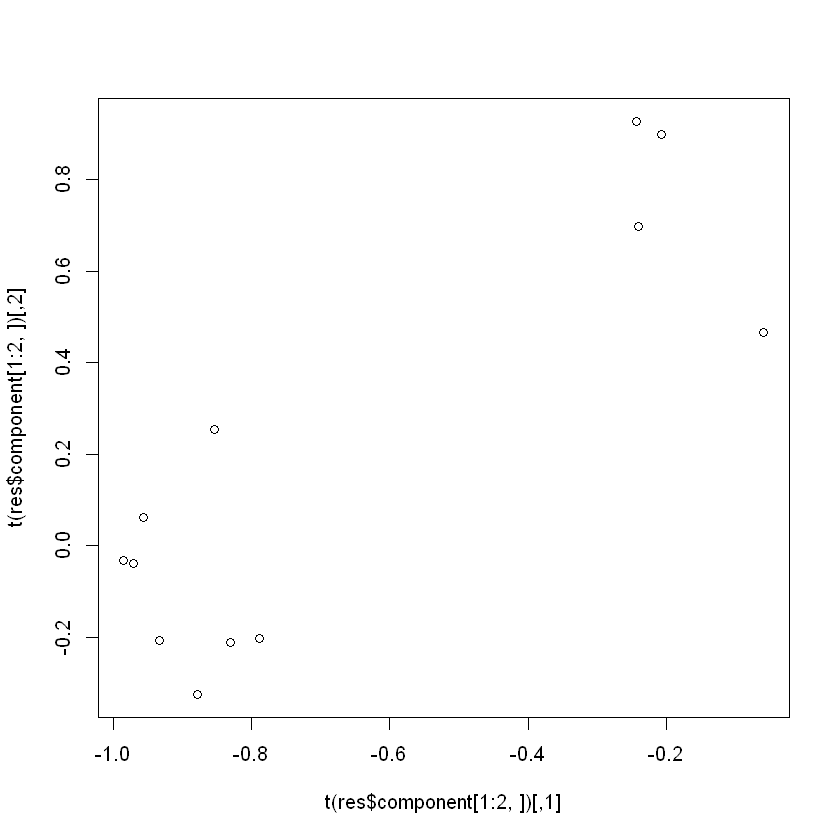

In [45]:
plot(t(res$component[1:2,]))

In [53]:
factorRotate2D <- function(comp){
    
    fV <- function(theta){
        A <- rotate2d(theta) %*% comp
        1/p * sum(sapply(1:m,function(j){
            sum(A[,j]^4) - sum(A[,j]^2)^2/p
        }))
    }

    fn <- function(theta){
        -fV(theta)
    }
    res <- optim(0,fn)
    list(opt = res, origin = comp, rotated = rotate2d(res$par) %*% comp)
}

In [55]:
res <- factorRotate2D(res$component[1:2,])
res

Warning message in optim(0, fn):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"

$opt
$opt$par
[1] 0.1152344

$opt$value
[1] -0.08044299

$opt$counts
function gradient 
      20       NA 

$opt$convergence
[1] 0

$opt$message
NULL


$origin
           [,1]       [,2]       [,3]       [,4]        [,5]        [,6]
[1,] -0.8784542 -0.8539697 -0.8301406 -0.7885342 -0.95576270 -0.98444113
[2,] -0.3251054  0.2539750 -0.2103542 -0.2030730  0.06203111 -0.03162285
           [,7]       [,8]        [,9]      [,10]      [,11]      [,12]
[1,] -0.9331906 -0.9707506 -0.05876909 -0.2067062 -0.2425792 -0.2407448
[2,] -0.2067750 -0.0388920  0.46513570  0.8983722  0.9269302  0.6983606

$rotated
           [,1]       [,2]       [,3]       [,4]       [,5]        [,6]
[1,] -0.9100086 -0.8191041 -0.8488214 -0.8066538 -0.9422916 -0.98154817
[2,] -0.2219450  0.3504796 -0.1135099 -0.1110609  0.1715128  0.08177744
            [,7]        [,8]         [,9]      [,10]      [,11]      [,12]
[1,] -0.95077641 -0.96878427 -0.004898245 -0.1020409 -0.1343924 -0.1588510
[2,] -0.09810582  0.07298237 

In [57]:
df2 <- data.frame(t(res$origin %*% t(as.matrix(df))))
df3 <- data.frame(t(res$rotated %*% t(as.matrix(df))))

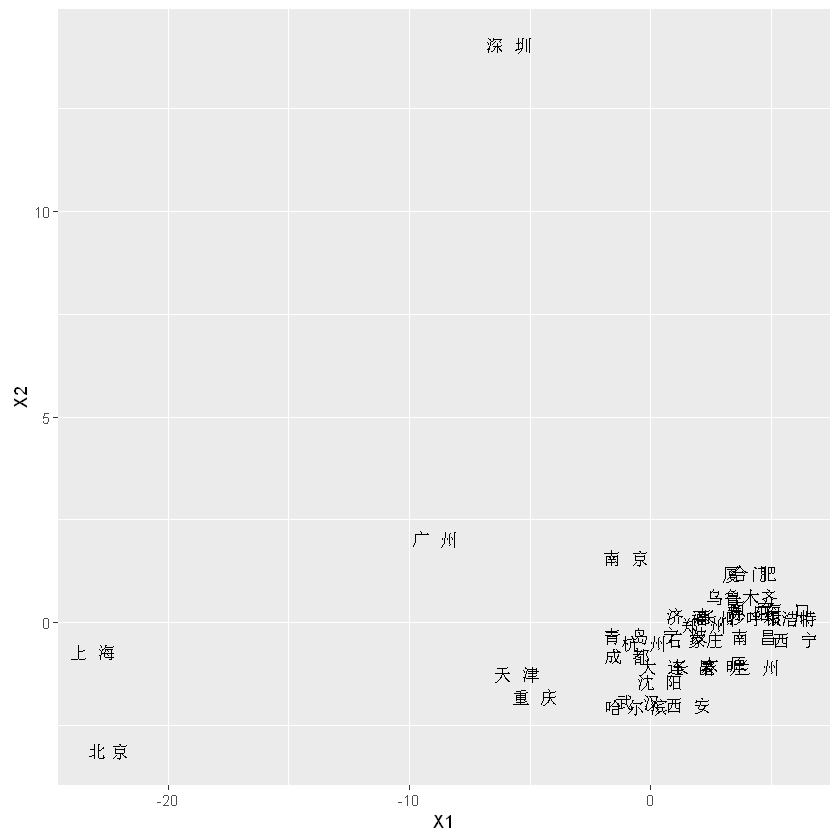

In [84]:
ggplot(df2,aes(X1,X2,label = city$X)) + geom_text()

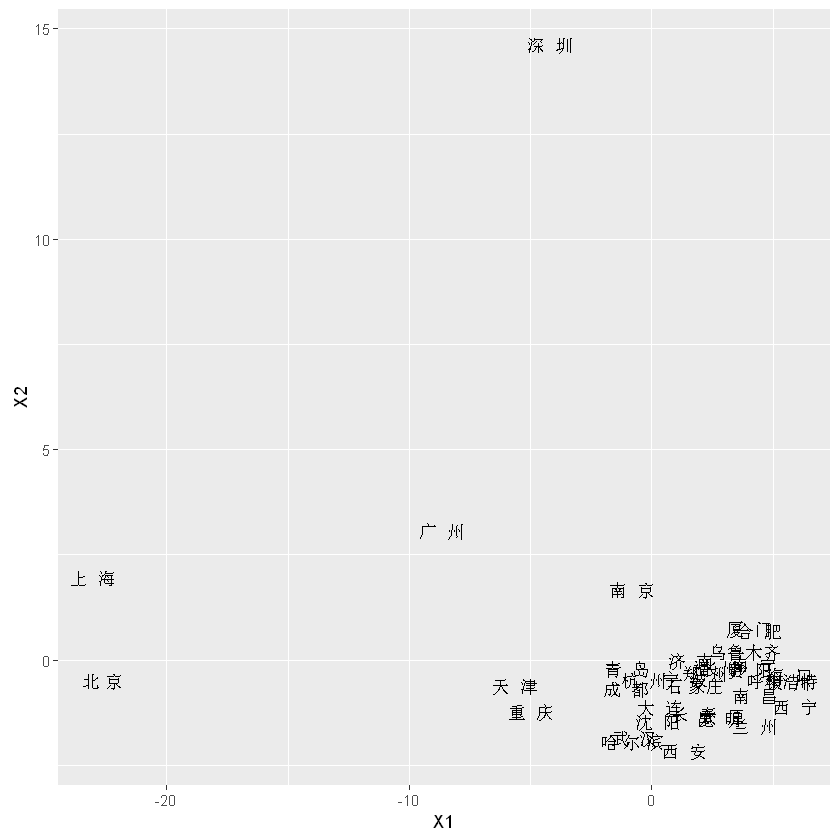

In [85]:
ggplot(df3,aes(X1,X2,label = city$X)) + geom_text()

In [86]:
10:1

[1] 10  9  8  7  6  5  4  3  2  1

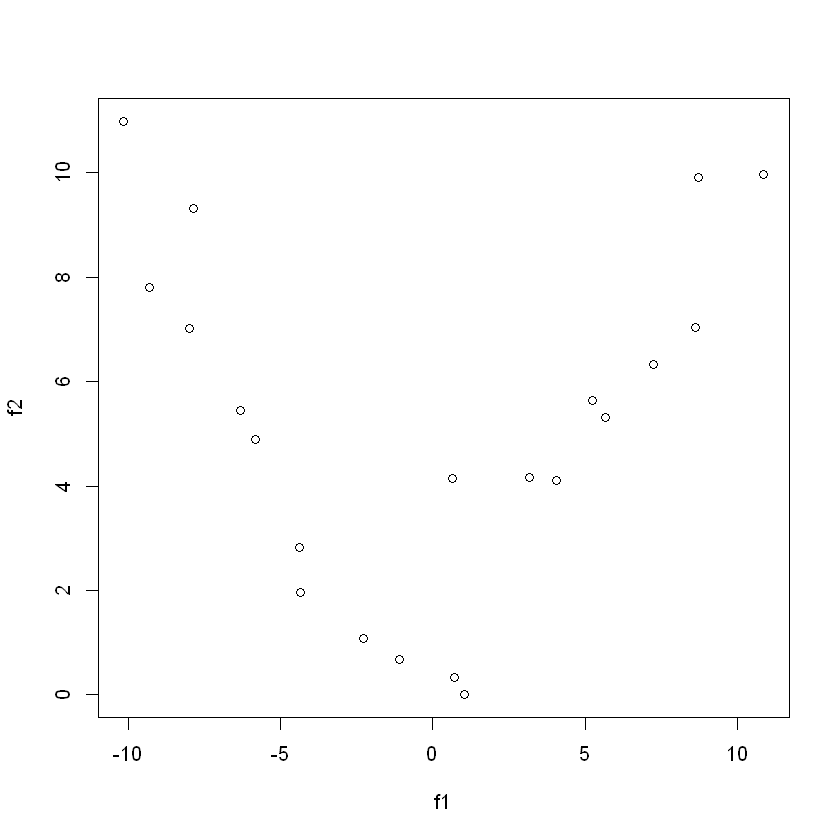

In [88]:
f1 <- -10:10 + rnorm(21)
f2 <- c(10:1,0,1:10)+rnorm(21)

fake <- rbind(f1,f2)
plot(t(fake))

In [92]:
res <- factorRotate2D(fake)
res

Warning message in optim(0, fn):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"

$opt
$opt$par
[1] 0.7831543

$opt$value
[1] -5045.252

$opt$counts
function gradient 
      32       NA 

$opt$convergence
[1] 0

$opt$message
NULL


$origin
        [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
f1 -10.13813 -9.284873 -7.871664 -7.986272 -6.324999 -5.832363 -4.382418
f2  10.98390  7.806244  9.312376  7.016669  5.440079  4.890764  2.821942
        [,8]      [,9]      [,10]       [,11]     [,12]    [,13]    [,14]
f1 -4.337011 -2.273905 -1.0898750 1.042794125 0.7208428 0.636314 3.161965
f2  1.961729  1.078409  0.6826231 0.004339843 0.3331357 4.148867 4.167189
      [,15]    [,16]    [,17]    [,18]    [,19]    [,20]     [,21]
f1 4.067715 5.257388 5.662535 7.258587 8.636034 8.733931 10.870966
f2 4.115060 5.635460 5.304667 6.317661 7.036804 9.903853  9.958503

$rotated
           [,1]      [,2]       [,3]       [,4]       [,5]       [,6]      [,7]
[1,]  0.5645355 -1.072664  0.9914694 -0.7094156 -0.6443983 -0.6828228 -1.114851
[2,] 14.9368353 12.082868 12.1

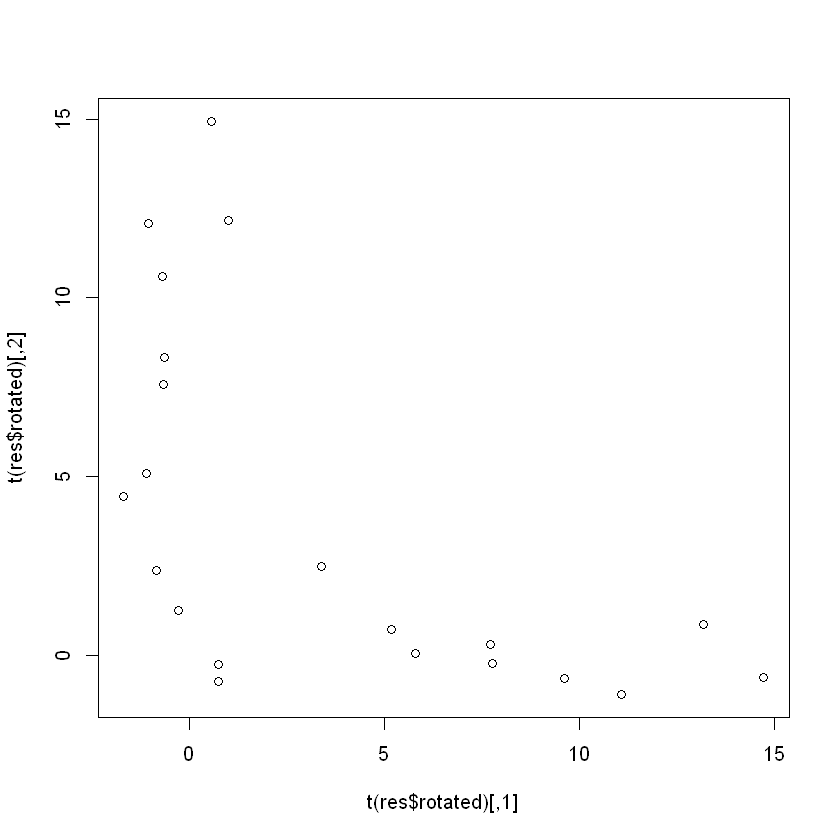

In [93]:
plot(t(res$rotated))

## 因子得分

以主成分法而言，可以分成三种似乎可以叫做因子得分的东西。

一个是直接用主成分得分当做对应的因子得分。

而是利用回归法，在每个观测利用类似（当只取两个因子时共$p$个分量时）

$$
\begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22} \\
\vdots & \vdots \\
A_{p1} & A_{p2}
\end{bmatrix}
\begin{bmatrix}
F_1 \\
F_2
\end{bmatrix}
=
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_p
\end{bmatrix}
$$

分别利用最小二乘法得到对应的$F_1,F_2$。

还有就是正交旋转后再使用回归法。在主成分法比较有效时，第一种方法与第二种方法应该取得差不多的结果。但第三种方法与极大似然法求得载荷矩阵$A$时，
回归法就显示出其独特价值了。

当然在此可以利用系数矩阵不变简化运算，由正规方程

$$
X^TX\hat{\beta} = X^T Y
$$

$X$为设计矩阵，一般是数据矩阵加个常数列得到的，不过这里只是借助回归的形式，并不带常数项。

于是$F$的"估计"为

$$
F = (A A^T)^{-1} A X
$$

这里$X$意义改为单个观测向量。注意到左边其实是不变的，我们可以缓存它再作用到每个$Y$即可。

### 主成分得分

In [115]:
pca <- PCA(df)
xy1 <- pca$coef[1:2,] %*% t(as.matrix(df))
xy1

-8.697552,-2.1381410,0.697185,1.1804692,2.09512636,0.1613436,0.7248870,-0.2241316,-8.9444930,-0.3822862,...,1.7104943,2.3293090,2.19415667,1.4812349,0.1911555,0.5524154,1.5180457,-0.3835184,-2.258773,-1.853689
-1.894449,-0.7545695,-0.249052,-0.6058123,0.08052934,-0.8659939,-0.6456607,-1.2359851,-0.4317334,0.9645340,...,-0.6456454,-0.2511419,0.08565663,0.3924728,-0.6518039,-0.1745390,0.7350153,-0.1865149,8.590950,-1.090616


### 直接回归得分

In [107]:
A <- pca$component[1:2,]
M <- solve(A %*% t(A)) %*% A
xy2 <- M %*% t(as.matrix(df))
xy2

-3.367540,-0.8278507,0.2699378,0.4570570,0.81119617,0.06246941,0.2806635,-0.08677983,-3.463151,-0.1480145,...,0.6622734,0.9018676,0.8495390,0.5735082,0.07401205,0.2138856,0.5877607,-0.1484916,-0.8745574,-0.7177158
-1.158272,-0.4613459,-0.1522711,-0.3703953,0.04923587,-0.52947111,-0.3947587,-0.75568472,-0.263963,0.5897188,...,-0.3947494,-0.1535489,0.0523707,0.2399590,-0.39851472,-0.1067136,0.4493904,-0.1140357,5.2525306,-0.6668055


### 转轴回归得分

In [108]:
xy3 <- factorRotate2D(A)$rotated %*% t(as.matrix(df))
xy3

Warning message in optim(0, fn):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"

-22.6709899,-5.6275871,1.7418842,2.914722,5.3904684,0.2510908,1.738372,-0.8074769,-23.029472,-0.799417,...,4.267080,5.928921,5.6455080,3.8741122,0.3678575,1.3844713,4.0329733,-1.019043,-4.179581,-4.960984
-0.4951131,-0.5910236,-0.6116829,-1.334842,-0.4913396,-1.4549245,-1.264294,-1.9415897,1.954746,1.680638,...,-1.556959,-1.099762,-0.5124176,0.1977901,-1.1157754,-0.4476276,0.7433995,-0.189146,14.628797,-1.221482


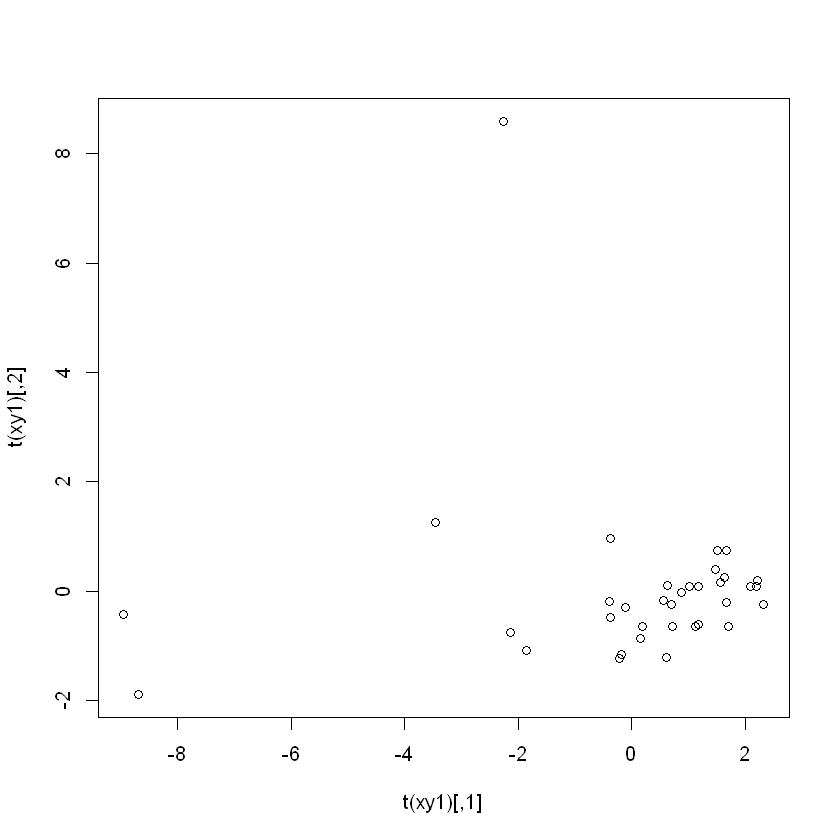

In [109]:
plot(t(xy1))

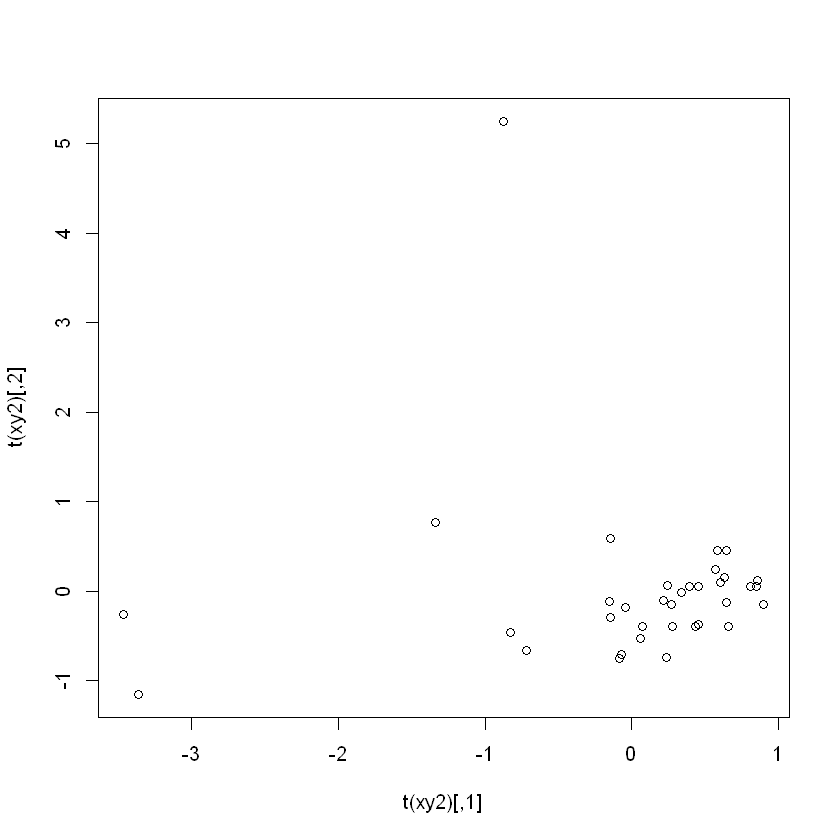

In [111]:
plot(t(xy2))

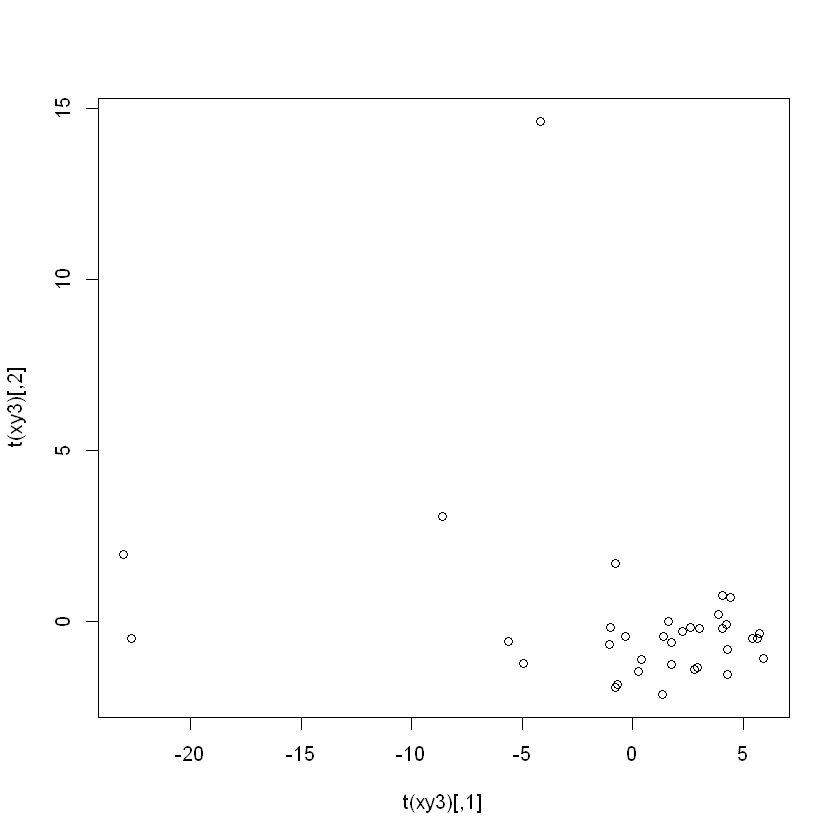

In [113]:
plot(t(xy3))

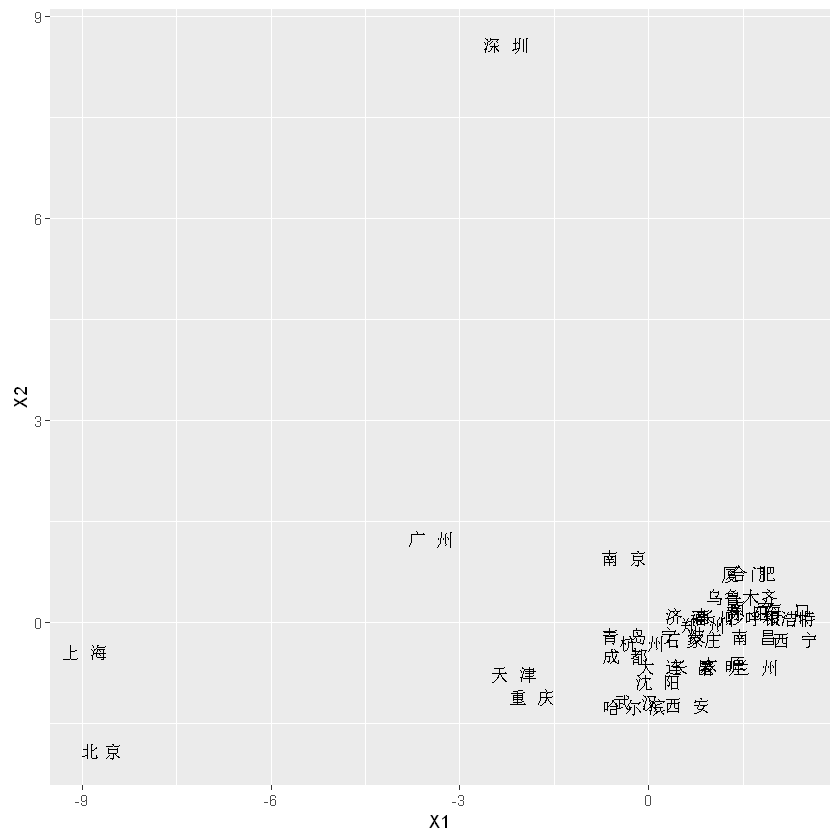

In [119]:
ggplot(data.frame(t(xy1)),aes(X1,X2,label=city$X)) + geom_text()